In [1]:
from keras.datasets import fashion_mnist
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam,SGD

In [2]:
#데이터 가져오기
(x_train, t_train), (x_test, t_test)=fashion_mnist.load_data()

In [3]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(x_train.shape, x_test.shape)
print(t_train.shape, t_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [4]:
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0

In [5]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [6]:
#모델구축 cnn
cnn=Sequential()
cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
# 완전연결성 평탄화
cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [7]:
cnn.compile(loss='sparse_categorical_crossentropy',
           optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) #정답 원 핫으로 안 만들었을 때 sparse
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [8]:
hist=cnn.fit(x_train, t_train, batch_size=128, epochs=30, validation_data=(x_test, t_test)) # 전체 크기를 배치 사이즈로 애폭크기가 줄어듬

Epoch 1/30
469/469 [==============================] - 47s 100ms/step - loss: 0.5136 - accuracy: 0.8190 - val_loss: 0.3242 - val_accuracy: 0.8844
Epoch 2/30
469/469 [==============================] - 48s 103ms/step - loss: 0.3347 - accuracy: 0.8799 - val_loss: 0.2803 - val_accuracy: 0.8964
Epoch 3/30
469/469 [==============================] - 49s 105ms/step - loss: 0.2863 - accuracy: 0.8980 - val_loss: 0.2672 - val_accuracy: 0.9036
Epoch 4/30
469/469 [==============================] - 48s 102ms/step - loss: 0.2544 - accuracy: 0.9085 - val_loss: 0.2383 - val_accuracy: 0.9096
Epoch 5/30
469/469 [==============================] - 47s 100ms/step - loss: 0.2292 - accuracy: 0.9171 - val_loss: 0.2242 - val_accuracy: 0.9177
Epoch 6/30
469/469 [==============================] - 47s 100ms/step - loss: 0.2084 - accuracy: 0.9229 - val_loss: 0.2256 - val_accuracy: 0.9181
Epoch 7/30
469/469 [==============================] - 47s 100ms/step - loss: 0.1936 - accuracy: 0.9287 - val_loss: 0.2215 - val_ac

In [9]:
cnn.evaluate(x_test, t_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3032 - accuracy: 0.9311


[0.30324938893318176, 0.9311000108718872]

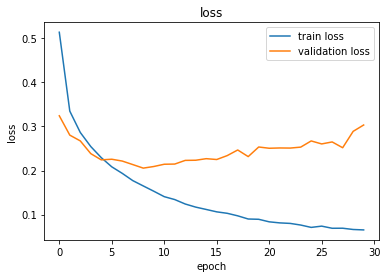

In [10]:
import matplotlib.pyplot as plt
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

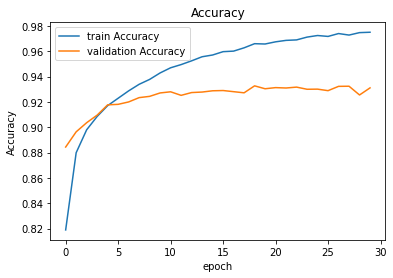

In [11]:
# loss대신 정확도
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train Accuracy')
plt.plot(hist.history['val_accuracy'], label='validation Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
#오버 피팅을 줄여야한다. 나란히 가게 ... 양질의 데이터 훈련을 많이 해야함!
#이미지 좌우반전 등등... 